In [3]:

import numpy as np
from PIL import Image
import cv2
from skimage.exposure import rescale_intensity


In [4]:
def resize(scale_percent,tstImg):
    width = int(tstImg.shape[1] * scale_percent / 100)
    height = int(tstImg.shape[0] * scale_percent / 100)
    dim = (width, height)
    # resize image
    resized = cv2.resize(tstImg, dim, interpolation = cv2.INTER_AREA)
    return resized

## EECS 531 Assignment 2

Due Friday March 27 before midnight. 100 points total.

### Submitting assignments to Canvas

- You can use this notebook as a starting point for completing the assignment.
- For jupyter notebooks, submit the .ipynb file and a pdf export of the notebook.
- Make sure you check that the pdf export represents the latest state of your notebook and that the equations and figures are properly rendered.

- If you decide not to a notebook, writeup your assignment using latex and submit a pdf with your code.  The writeup should include relevant code with description if it can fit on a page.  

- Use the following format for filenames:
  - `EECS531-A2-yourcaseid.ipynb`
  - `EECS531-A2-yourcaseid.pdf`

- If you have more than these two files, put any additional files in a directory named `EECS531-A2-yourcaseid`. Do not include binaries or large data files. Then zip this directory and submit it with the name `EECS531-A2-yourcaseid.zip`.  Do not use other compression formats.  The `.ipynb` file can be included in the zipped directory, but make sure you submit the `.pdf` file along with the `.zip` file.  This is so it appears at the top level on canvas, which allows for easier grading.

Many of these exercises also involve a wide range of choice in terms of how you complete them.  In terms of grading I'm mainly looking for whether you demonstrate understanding of the concepts. Concise answers are sufficient if you demonstrate clear understanding.  If you find yourself writing very lengthy answers and going deeper and deeper into a question, consider moving that work to the exploration component.

## Krashagi Gupta - kxg360

### Exercise 1. Feature Detection (40 pts)

In this exercise, you will need code that does auto-correlation (as opposed to convolution) a feature kernel with an image.  You may use your code from A1 or use a library function.  You should implement the thresholding by hand.  In this problem you will have several design choices, so first think about your overall design and what you will need for all the parts before you start coding.

1.1 (10 pts) Implement a matched-filter based feature detector.  The function should take as input an image, a feature kernel, and a detection threshold.  It should correlate (or more loosely speaking, convolve) the image with the feature, and return returns the location(s) of the detected features.  You will have to make several decisions while implementing this, so explain your design and choices.

1.2 (5 pts) Show that your code correctly detects features on images with known feature locations by overlaying a plot of the dectected feature locations on the image. You may generate this image yourself, or identify the true feature locations manually.

1.3 (5 pts) Add noise to the image and show how the dection probability goes down, the number of false positives and false negatives goes up.

1.4 (10 pts) Plot and ROC curve by systematically varying the noise and threshold on your test image with known feature locations.

1.5 (10 pts) Test your detector on a more realistic image with a different and more challenging feature to detect.


In [18]:
# 1.1 (10 pts) Implement a matched-filter based feature detector. 
# The function should take as input an image, a feature kernel,
# and a detection threshold. 
# It should correlate (or more loosely speaking, convolve) the image with the feature, and return returns the location(s)
# of the detected features.  You will have to make several decisions while implementing this, 
# so explain your design and choices.


def feature_detector(tstImg, feat_kernel, threshold, orig):

    
    # finding width and height
    w, h = feat_kernel.shape[::-1] # reverse the order of shape

    res = cv2.matchTemplate(tstImg, feat_kernel, cv2.TM_CCOEFF_NORMED);
    loc = np.where(res >= threshold)

    
    for pt in zip(*loc[::-1]):
        cv2.rectangle(orig, pt, (pt[0] + w, pt[1] + h),(0, 255, 0), 2);

    return orig
    



Text(0.5, 1.0, ' M detections at threshold 0.8')

<Figure size 432x288 with 0 Axes>

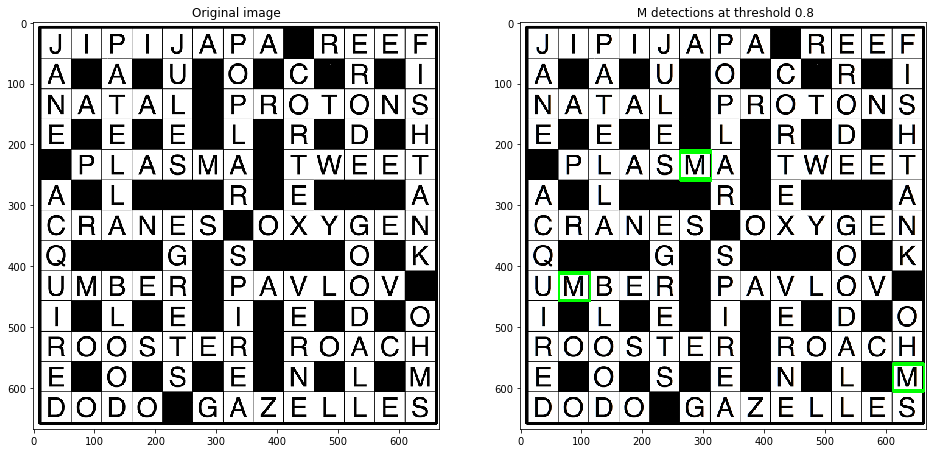

In [6]:
# 1.2 (5 pts) Show that your code correctly detects features on images with known feature locations
# by overlaying a plot of the dectected feature locations on the image.
# You may generate this image yourself, or identify the true feature locations manually.

import numpy as np
from PIL import Image
import cv2
from skimage.exposure import rescale_intensity
import matplotlib.pyplot as plt
import matplotlib.colors



tstImg = cv2.imread("pics/crossward.png",0);
orig = cv2.imread("pics/crossward.png");
threshold = 0.8;
feat_kernel = cv2.imread("pics/m.png",0);



# feature_detector(tstImg, feat_kernel, threshold);
matching = feature_detector(tstImg, feat_kernel, threshold, orig);

plt.figure()
    
plt.figure(figsize =(16,16))

# display original
plt.subplot(1,2,1)
plt.imshow(tstImg, cmap='gray')
plt.title("Original image")

# display high pass image
plt.subplot(1,2,2)
plt.imshow(matching, cmap='gray')
plt.title(" M detections at threshold 0.8")
        


# tstImgRs = resize(30,tstImg);
# feat_kernel = resize(20, feat_kernel);
# gray= cv2.cvtColor(tstImg, cv2.COLOR_BGR2GRAY)
# feat_kernel= cv2.cvtColor(feat_kernel, cv2.COLOR_BGR2GRAY)

# Image.fromarray(gray)
# Image.fromarray(feat_kernel)



In [5]:
def add_shot_noise(image, shots):
    newImage = np.copy(image)
    for i in range(0, shots):
        x = np.random.randint(image.shape[0])  
        y = np.random.randint(image.shape[1])  
        newImage[x, y] = 255
    return newImage

Text(0.5, 1.0, ' detections at threshold 0.8 - no detections due to noise')

<Figure size 432x288 with 0 Axes>

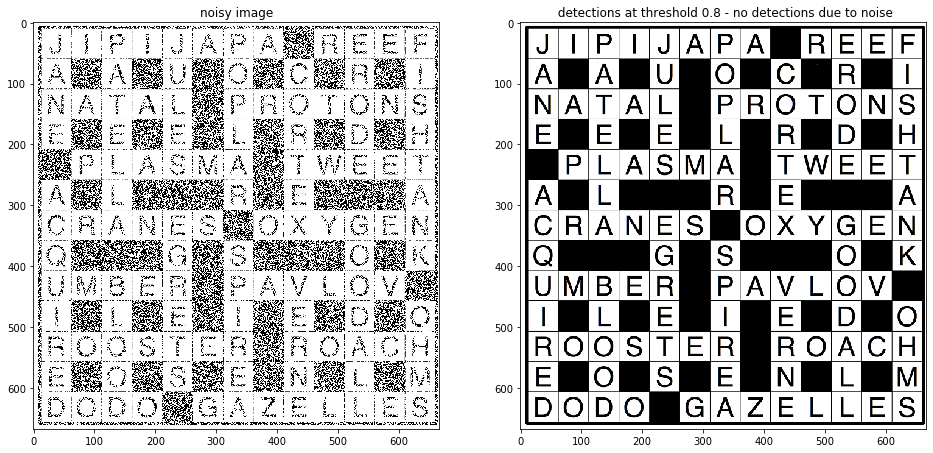

In [19]:
# 1.3 (5 pts) Add noise to the image and show how the dection probability goes down,
# the number of false positives and false negatives goes up.

import numpy as np
from PIL import Image
import cv2
from skimage.exposure import rescale_intensity
import matplotlib.pyplot as plt
import matplotlib.colors

# get noisy image
tstImg = cv2.imread("pics/crossward.png",0);
orig = cv2.imread("pics/crossward.png");
feat_kernel = cv2.imread("pics/m.png",0);


tstnoisy = add_shot_noise(tstImg, 300000);
thresh_p8 = feature_detector(tstnoisy, feat_kernel, 0.8, orig);
# thresh_p6 = feature_detector(tstnoisy, feat_kernel, 0.6, orig);
# thresh_p4 = feature_detector(tstnoisy, feat_kernel, 0.4, orig);
# thresh_p6 = feature_detector(tstnoisy, feat_kernel, 0.6, orig);

plt.figure()    
plt.figure(figsize = (16,16))

# display noisy image
plt.subplot(1,2,1)
plt.imshow(tstnoisy, cmap='gray')
plt.title("noisy image")


plt.subplot(1,2,2)
plt.imshow(thresh_p8, cmap='gray')
plt.title(" detections at threshold 0.8 - no detections due to noise")









TP - 1, FN - 2, FP - 0


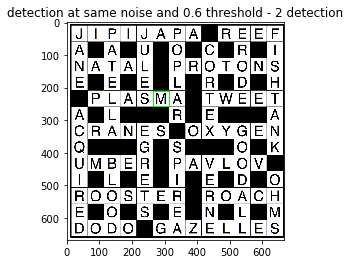

In [20]:
import numpy as np
from PIL import Image
import cv2
from skimage.exposure import rescale_intensity
import matplotlib.pyplot as plt
import matplotlib.colors

tstImg = cv2.imread("pics/crossward.png",0);
orig = cv2.imread("pics/crossward.png");
feat_kernel = cv2.imread("pics/m.png",0);


tstnoisy = add_shot_noise(tstImg, 300000);

thresh_p6 = feature_detector(tstnoisy, feat_kernel, 0.6, orig);
plt.imshow(thresh_p6, cmap='gray')
plt.title("detection at same noise and 0.6 threshold - 2 detection")
print("TP - 1, FN - 2, FP - 0")




In [15]:
# 1.4 (10 pts) Plot an ROC curve by systematically varying the noise
# and threshold on your test image with known feature locations.

# -> noise -> vary the threshold -> tp, tn, fp, fn, 

import numpy as np
from PIL import Image
import cv2
from skimage.exposure import rescale_intensity

def feature_detector(tstImg, feat_kernel, threshold, orig):       
        
    # finding width and height
    w, h = feat_kernel.shape[::-1] # reverse the order of shape
    res = cv2.matchTemplate(tstImg, feat_kernel, cv2.TM_CCOEFF_NORMED);
    loc = np.where(res >= i)
    
    for pt in zip(*loc[::-1]):
        cv2.rectangle(orig, pt, (pt[0] + w, pt[1] + h),(0, 255, 0), 2);
    cv2.imshow("matching", orig);
    
    cv2.waitKey(0);
    cv2.destroyAllWindows();

# varying threshold means : 0.1, 0.2, 0.3 ... 0.9 -> loop
threshold = 0.1
index_thresh = []
for i in range (1, 9):  #-> not : but ,
    threshold  = threshold + 0.1
    index_thresh.append(round(threshold, 1))


# get noisy image
tstImg = cv2.imread("pics/crossward.png",0);
orig = cv2.imread("pics/crossward.png");


# threshold = 0.6;
feat_kernel = cv2.imread("pics/m.png",0);


tstnoisy = add_shot_noise(tstImg, 300000);
cv2.imshow("noisy", tstnoisy);
cv2.waitKey(0);
cv2.destroyAllWindows();

for i in index_thresh :
        feature_detector(tstnoisy, feat_kernel, i, orig);



Text(0.5, 1.0, ' A detections at threshold 0.8')

<Figure size 432x288 with 0 Axes>

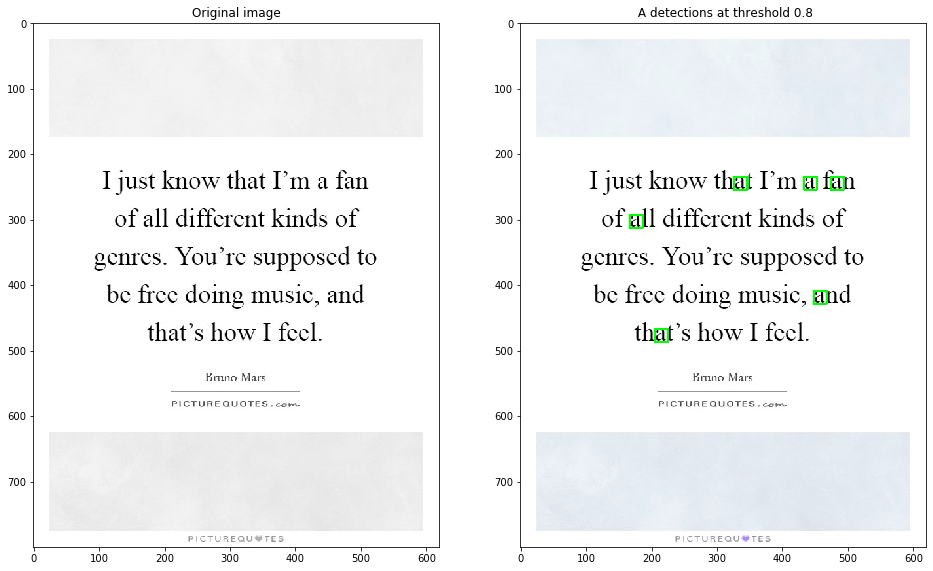

In [17]:
# 1.5 (10 pts) Test your detector on a more realistic image with a different and more challenging feature to detect.

# 1.2 (5 pts) Show that your code correctly detects features on images with known feature locations
# by overlaying a plot of the dectected feature locations on the image.
# You may generate this image yourself, or identify the true feature locations manually.

import numpy as np
from PIL import Image
import cv2
from skimage.exposure import rescale_intensity
import matplotlib.pyplot as plt
import matplotlib.colors



tstImg = cv2.imread("pics/quote.jpg",0);
orig = cv2.imread("pics/quote.jpg");
threshold = 0.8;
feat_kernel = cv2.imread("pics/a.jpg",0);



# feature_detector(tstImg, feat_kernel, threshold);
matching = feature_detector(tstImg, feat_kernel, threshold, orig);

plt.figure()
    
plt.figure(figsize =(16,16))

# display original
plt.subplot(1,2,1)
plt.imshow(tstImg, cmap='gray')
plt.title("Original image")

# display high pass image
plt.subplot(1,2,2)
plt.imshow(matching, cmap='gray')
plt.title(" 'A' detections at threshold 0.8")
        


# tstImgRs = resize(30,tstImg);
# feat_kernel = resize(20, feat_kernel);
# gray= cv2.cvtColor(tstImg, cv2.COLOR_BGR2GRAY)
# feat_kernel= cv2.cvtColor(feat_kernel, cv2.COLOR_BGR2GRAY)

# Image.fromarray(gray)
# Image.fromarray(feat_kernel)


### Exercise 2. Spectral Representation (20 pts)

In this exercise, you will need a package that implements the two-dimensional forward and inverse discrete cosine transform (DCT), e.g. scipy.fftpack.dct in python or dct2 and idct2 in Matlab.

2.1 (10 pts) Plot the basis functions of a 16x16 discrete cosine transform (DCT).

2.2 (10 pts) Show how an arbitrary image can be represented by the sum of the $k$ basis functions with largest magnitude.  Write the mathematical expressions for the forward and inverse representations, and illustrate it for small and large values of $k$.

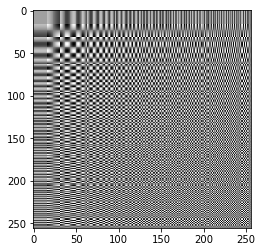

In [103]:
# 2.1 (10 pts) Plot the basis functions of a 16x16 discrete cosine transform (DCT).
from scipy.fftpack import dct, idct
from skimage import io, data
from numpy import r_
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

img = data.camera()

def dct_2D(matrix):
    # field <norm> is to set up normilization.
    # filed <axis> is to set which axis of the input data to do DCT.
    return dct(dct(matrix, axis=0, norm='ortho'), axis=1, norm='ortho')
def idct_2D(matrix):
    # field <norm> is to set up normilization.
    # filed <axis> is to set which axis of the input data to do DCT.
    return idct(idct(matrix, axis=0), axis=1)

def plotting(size):
    bit = np.zeros((size, size))
    
    
    for i in range(size):
        temp_x = bit
        
        for j in range(size):
            bit[i][j] = 1
            if j == 0:
                temp_x = idct_2D(bit)
            else:
                temp_x = np.append(temp_x, idct_2D(bit), axis = 1)
            bit[i][j] = 0 
            
        if i == 0:
            coeff = temp_x
        else:
            coeff = np.append(coeff, temp_x, axis = 0)  
            
    return coeff

plt.figure()
plt.imshow(plotting(16), cmap='gray')


Text(0.5, 1.0, ' low K basis functions ')

<Figure size 432x288 with 0 Axes>

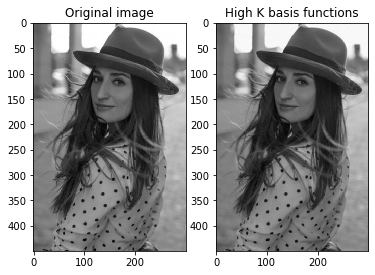

<Figure size 432x288 with 0 Axes>

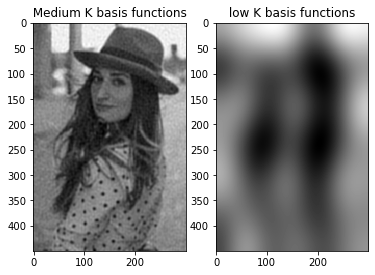

In [97]:
# 2.2 (10 pts) Show how an arbitrary image can be represented by the sum of the  𝑘  basis
# functions with largest magnitude. Write the mathematical expressions
# for the forward and inverse representations, and illustrate it for small and large values of  𝑘 .

# Perform a blockwise DCT
import numpy as np
import matplotlib.pyplot as plt
import scipy

from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy import signal
from scipy import misc # pip install Pillow
from scipy import fftpack
import matplotlib.pylab as pylab
tstImg2 = cv2.imread("pics/sara_b1.jpg",0);
imsize = tstImg2.shape
dct = np.zeros(imsize)

def idct2(a):
    return scipy.fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

def dct2(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

dct = dct2(tstImg2) 

# Threshold DCT coefficients
def calc_dct_thresh(dct, thresh):
    dct_thresh = dct * ( abs(dct) > (thresh * np.max(abs(dct))))   
    return dct_thresh


dct_thresh1 = calc_dct_thresh(dct, 0.0001)
im_dct1 = idct2(dct_thresh1)


dct_thresh2 = calc_dct_thresh(dct, 0.001)
im_dct2 = idct2(dct_thresh2)

dct_thresh3 = calc_dct_thresh(dct, 0.05)
im_dct3 = idct2(dct_thresh3)

plt.figure()

plt.figure(figsize = (6,6))

# display original
plt.subplot(1,2,1)
plt.imshow(tstImg2, cmap='gray')
plt.title("Original image")


plt.subplot(1,2,2)
plt.imshow(im_dct1, cmap='gray')
plt.title("High K basis functions")

plt.figure()
plt.figure(figsize = (6, 6))

plt.subplot(1,2,1)
plt.imshow(im_dct2, cmap='gray')
plt.title(" Medium K basis functions ")

plt.subplot(1,2,2)
plt.imshow(im_dct3, cmap='gray')
plt.title(" low K basis functions ")



### Exercise 3. Spectral Filtering (20 pts)

3.1 (10 pts) Implement low- and high-pass image filters by zeroing different ranges of the DCT coefficients you used in the previous exercise.

3.2 (10 pts) Show that convolving a 2D convolution kernel with an image is (approximately) equivalent to multiplying the transforms of the kernel and the image and then applying the inverse transform. You will need to center and pad the kernel so that the signals are the same size.

Text(0.5, 1.0, 'low pass image 0-33% of lowest frequencies')

<Figure size 432x288 with 0 Axes>

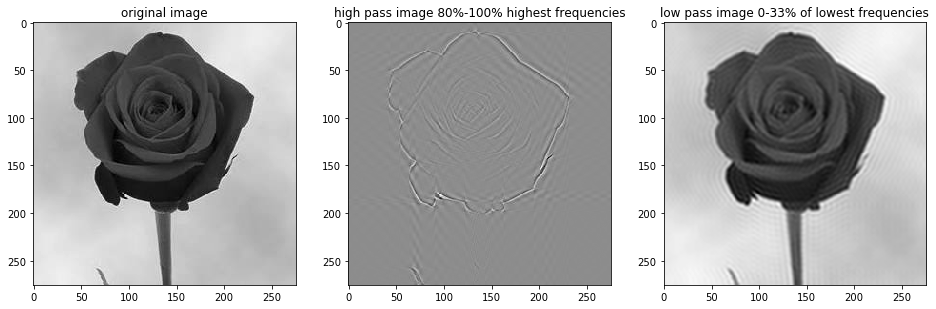

In [77]:
# 3.1 (10 pts) Implement low- and high-pass
# image filters by zeroing different ranges
# of the DCT coefficients you used in the previous exercise.

import numpy as np
import matplotlib.pyplot as plt
import scipy
from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy import signal
from scipy import misc # pip install Pillow
from scipy import fftpack
import matplotlib.pylab as pylab


# definition of dct and idct
def idct2(image_matrix):
    return scipy.fftpack.idct( scipy.fftpack.idct( image_matrix, axis=0 , norm='ortho'), axis=1 , norm='ortho')

def dct2(image_matrix):
    return scipy.fftpack.dct( scipy.fftpack.dct( image_matrix, axis=0, norm='ortho' ), axis=1, norm='ortho' )

# reading test image in grayscale
tstImg2 = cv2.imread("pics/rose.jpg",0);
imsize = tstImg2.shape
dct = np.zeros(imsize)

# actual dct
dct = dct2(tstImg2)

# low pass
lmt_bot = 0;
lmt_top = int(0.33 * imsize[0])

low_pass_dct = np.zeros(imsize)
for i in range(lmt_bot, lmt_top):
    for j in range(lmt_bot, lmt_top):
        low_pass_dct[i][j] = dct[i][j]
        
low_pass_image = idct2(low_pass_dct);


# high pass
lmt_bot = imsize[0] - int(0.88 * imsize[0])
lmt_top = imsize[0] 

high_pass_dct = np.zeros(imsize)
for i in range(lmt_bot, lmt_top):
    for j in range(lmt_bot, lmt_top):
        high_pass_dct[i][j] = dct[i][j]

high_pass_image = idct2(high_pass_dct);


plt.figure()
plt.figure(figsize =(16,16))

# display original
plt.subplot(1,3,1)
plt.imshow(tstImg2, cmap='gray')
plt.title("original image")

# display high pass image
plt.subplot(1,3,2)
plt.imshow(high_pass_image, cmap='gray')
plt.title("high pass image 80%-100% highest frequencies")

# display low pass image
plt.subplot(1,3,3)
plt.imshow(low_pass_image, cmap='gray')
plt.title("low pass image 0-33% of lowest frequencies")







Text(0.5, 1.0, 'INVERSE image')

<Figure size 432x288 with 0 Axes>

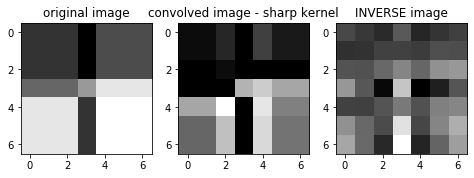

<Figure size 432x288 with 0 Axes>

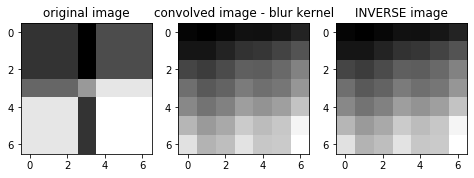

In [13]:
# 3.2 (10 pts) Show that convolving a 2D convolution kernel with an image is (approximately)
# equivalent to multiplying the transforms of the kernel and the image and then applying 
# the inverse transform. You will need to center and pad the kernel so that the signals are the same size.


import numpy as np
import matplotlib.pyplot as plt
import scipy
from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy import signal
from scipy import misc # pip install Pillow
from scipy import fftpack
import matplotlib.pylab as pylab
from PIL import Image
import cv2
from skimage.exposure import rescale_intensity

def linear_filter(gray, kernel):    
    
    # determining the dimensions of image and kernel    
    (iH, iW) = gray.shape[:2] ;   
    (kH, kW) = kernel.shape[:2] ;
    
    #bordering the original image by repeating the border edges on all sides 
    pad = (kW - 1) // 2 # pad = 1 
    gray = cv2.copyMakeBorder(gray, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    
    # creating an output image with the same dimensions as input image 
    output = np.zeros((iH, iW), dtype="float32") 
    
    # looping through the height dimension after the top padding to the bottom padding edge 
    for y in np.arange(pad, iH + pad):
        
        # looping through the width dimension after the left padding to the right padding edge 
        for x in np.arange(pad, iW + pad):
            
            # locating the region of interest where actual convolution needs to be done  
                roi = gray[y - pad:y + pad + 1, x - pad:x + pad + 1];
                
                # convolution 
                k = (roi * kernel).sum() ;
                
                # appending to output 
                output[y - pad, x - pad] = k ;
                
    # rescale_intensity to ensure pixels are in between 0,255 range 
    output = rescale_intensity(output, in_range=(0, 255)) 
    output = (output * 255).astype("uint8")
            
    return output

# definition of dct and idct
def dct2(image_matrix):
    return scipy.fftpack.dct( scipy.fftpack.dct( image_matrix, axis=0, norm='ortho' ), axis=1, norm='ortho' )
def idct2(image_matrix):
    return scipy.fftpack.idct( scipy.fftpack.idct( image_matrix, axis=0 , norm='ortho'), axis=1 , norm='ortho')


# kernel
sharp_kernel = np.array([[0, -1, 0], [-1, 5, -1],[0, -1, 0]]) #sharpen
blur_kernel = np.array([[0.0625, 0.125, 0.0625], [0.125, 0.25, 0.125],[0.0625, 0.125, 0.0625]]) # gaussian blur


imageLHS2  = np.array([[1, -1, 2], [3, 5, 8],[8, 1, 9]])

imageLHS2 = cv2.copyMakeBorder(imageLHS2, 2, 2, 2, 2, cv2.BORDER_REPLICATE)
(iH, iW) = imageLHS2.shape[:2]




# convolving system
imageLHS_out1 = linear_filter(imageLHS2, sharp_kernel)
imageLHS_out2 = linear_filter(imageLHS2, blur_kernel)



zero_embed  = np.zeros([iH, iW])
blur_kernel = np.pad(blur_kernel, ((0,4) , (0,4)), mode = 'constant', constant_values=(0, 0))
blur_kernel = zero_embed + blur_kernel
sharp_kernel = np.pad(sharp_kernel, ((0,4) , (0,4)), mode = 'constant', constant_values=(0, 0))
sharp_kernel = zero_embed + sharp_kernel





# kernel - transform
ker_trans1 = dct2(sharp_kernel)
ker_trans2 = dct2(blur_kernel)


# image - transform
# image_trans = dct2(imageLHS)
image_trans2 = dct2(imageLHS2)


# multiply
def multiply(image_trans, ker_trans):
    return image_trans * ker_trans
    
transform_product1 = multiply(ker_trans1,image_trans2) 
transform_product2 = multiply(ker_trans2,image_trans2)


# take inverse 
imageRHS_out1 = idct2(transform_product1);
imageRHS_out2 = idct2(transform_product2);


plt.figure()
plt.figure(figsize =(8,8))

# display original
plt.subplot(1,3,1)
plt.imshow(imageLHS2, cmap='gray')
plt.title("original image")

# display covolved
plt.subplot(1,3,2)
plt.imshow(imageLHS_out1, cmap='gray')
plt.title("convolved image - sharp kernel")

# display inverse
plt.subplot(1,3,3)
plt.imshow(imageRHS_out1, cmap='gray')
plt.title("INVERSE image")

plt.figure()
plt.figure(figsize =(8,8))

# display original
plt.subplot(1,3,1)
plt.imshow(imageLHS2, cmap='gray')
plt.title("original image")

# display covolved
plt.subplot(1,3,2)
plt.imshow(imageRHS_out2, cmap='gray')
plt.title("convolved image - blur kernel")

# display inverse
plt.subplot(1,3,3)
plt.imshow(imageRHS_out2, cmap='gray')
plt.title("INVERSE image")







In [47]:
# from skimage.exposure import rescale_intensity
# import numpy as np
# from PIL import Image 
# import cv2

# img =  cv2.filter2D(np.array(imageLHS2), -1, sharp_kernel)
# print(img)


### Exploration (20 pts)

In these problems, you are meant to do creative exploration. Please read the rubric below.  This is meant to be open-ended; you should not feel the need to write a book chapter; but neither should you just change the numbers in one of the problems above.  After doing the readings and problems above, you should pick a concept you want to understand better or an simple modeling idea you want to try out.  You can also start to explore ideas for your project. 

Some other ideas:
- reproduce a figure from the readings
- derive or illustrate equations from the readings
- an exercise from the textbook (with explanation)

The general idea is for you to teach yourself (and potentially a classate) about a concept from the assignments and readings or solidify your understanding of required technical background.

#### Exploration Grading Rubric

Exploration problems will be graded according the elements in the table below.  The scores in the column headers indicate the number of points possible for each rubric element (given in the rows).  A score of zero for an element is possible if it is missing entirely.

|   Element  | Substandard (+1) | Basic (+2) | Good (+3) | Excellent (+5) |
| :-- | :----------- | :---- | :--- | :-------- |
| <b> Pedagogical Value </b> | No clear statement of idea or concept being explored or explained; lack of motivating questions. | Simple problem with adequate motivation; still could be a useful addition to an assignment. | Good choice of problem with effective illustrations of concept(s).  Demonstrates a deeper level of understanding. | Problem also illustrates or clarifies common conceptual difficulties or misconceptions. |
| <b> Novelty of Ideas </b> | Copies existing problem or makes only a trivial modification; lack of citation(s) for source of inspiration. | Concepts are similar to those covered in the assignment but with some modifications of an existing exericse. | Ideas have clear pedagogical motivation; creates different type of problem or exercise to explore related or foundational concepts more deeply. | Applies a technique or explores concept not covered in the assignment or not discussed at length in lecture. |
| <b> Clarity of Explanation </b> | Little or confusing explanation; figures lack labels or useful captions; no explanation of motivations. | Explanations are present, but unclear, unfocused, wordy or contain too much technical detail. | Clear and concise explanations of key ideas and motivations. | Also clear and concise, but includes illustrative figures; could be read and understood by students from a variety of backgrounds. |
| <b> Depth of Exploration </b> | Content is obvious or closely imitates assignment problems. | Uses existing problem for different data. | Applies a variation of a technique to solve a problem with an interesting motivation; explores a concept in a series of related problems. | Applies several concepts or techniques; has clear focus of inquiry that is approached from multiple directions.|


Text(0.5, 1.0, 'original image with faces and eyes detected')

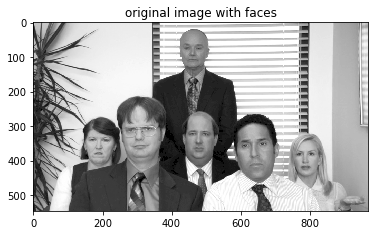

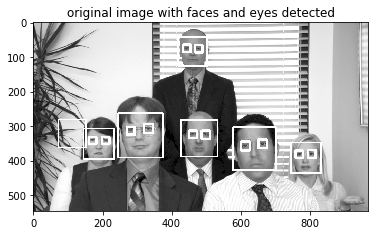

In [22]:
# Exploration 

# My exploration was essentially to understand what are the various kind of tools available in opencv
# to do various kinds of feature detection

# Part 1
# Using trained xml files available to detect faces, and eyes on faces


import cv2
import numpy as np
import matplotlib.pyplot as plt


face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml");
eye_cascade = cv2.CascadeClassifier("haarcascade_eye_tree_eyeglasses.xml")

testImg = cv2.imread("pics/office.png",0);
plt.figure()
plt.imshow(testImg, cmap='gray')
plt.title("original image with faces")

faces = face_cascade.detectMultiScale(testImg, 1.1 , 4)
for (x, y, w, h) in faces:
    cv2.rectangle(testImg, (x,y), (x + w, y + h), (255, 0, 0), 3);
    roi_gray = testImg[y : y+h , x : x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_gray, (ex, ey),(ex + ew,ey + eh), (255,0 , 0),5)

plt.figure()
plt.imshow(testImg, cmap='gray')
plt.title("original image with faces and eyes detected")



Text(0.5, 1.0, 'shapes in grayscale')

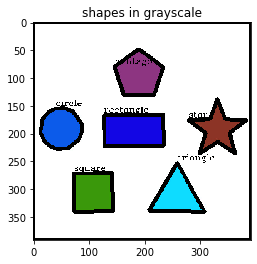

In [24]:
# Part 2
# How to detect shapes by finding contors

import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("pics/shapes.jpg");
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY);
threshold = 220 ;
max_value = 255 ;
_,thresh = cv2.threshold(img_grey, threshold, max_value, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

for contour in contours:
    epsilon = 0.01
    approx = cv2.approxPolyDP(contour,epsilon*cv2.arcLength(contour, True), True)
    cv2.drawContours(img, [approx], 0, [0, 0, 0], 5)
    x = approx.ravel()[0]
    y = approx.ravel()[1] - 5
    if len(approx) == 3 :
        cv2.putText(img, "triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX , 0.5, (0, 0, 0))
    elif len(approx) ==  4:
        x1, y1, w, h = cv2.boundingRect(approx)
        aspect_ratio = float(w/h)
        
        if(aspect_ratio) >= 0.95 and aspect_ratio <=1.05:
            cv2.putText(img,"square",(x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
        else:
            cv2.putText(img, "rectangle", (x, y), cv2.FONT_HERSHEY_COMPLEX , 0.5, (0, 0, 0))
    elif len(approx) ==  5:
        cv2.putText(img, "pentagon", (x, y), cv2.FONT_HERSHEY_COMPLEX , 0.5, (0, 0, 0))
    elif len(approx) ==  6:
        cv2.putText(img, "hexagon", (x, y), cv2.FONT_HERSHEY_COMPLEX , 0.5, (0, 0, 0))
    elif len(approx) ==  5:
        cv2.putText(img, "pentagon", (x, y), cv2.FONT_HERSHEY_COMPLEX , 0.5, (0, 0, 0))
    elif len(approx) ==  10:
        cv2.putText(img, "star", (x, y), cv2.FONT_HERSHEY_COMPLEX , 0.5, (0, 0, 0))
    else:
        cv2.putText(img, "circle", (x, y), cv2.FONT_HERSHEY_COMPLEX , 0.5, (0, 0, 0))
    
 
plt.figure()
plt.imshow(img, cmap='gray')
plt.title("shapes in grayscale")


Text(0.5, 1.0, 'detecting corners after adding noise')

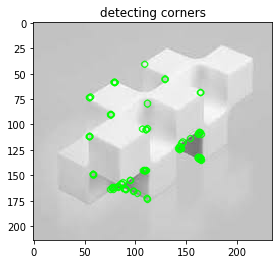

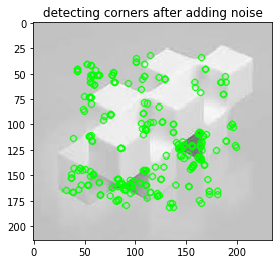

In [31]:
# part 3

# using the already established feature detectors to detect corners in the image
# how detection becomes imprecise when we add more noise
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

def add_shot_noise(image, shots):
    newImage = np.copy(image)
    for i in range(0, shots):
        x = np.random.randint(image.shape[0])  
        y = np.random.randint(image.shape[1])  
        newImage[x, y] = 255
    return newImage

img = cv.imread('pics/img_corner.jpg',0)
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location, not size and orientation

img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.figure()
plt.imshow(img2)
plt.title("detecting corners")


tstnoisy = add_shot_noise(img, 500);
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp = orb.detect(tstnoisy,None)
# compute the descriptors with ORB
kp, des = orb.compute(tstnoisy, kp)
# draw only keypoints location, not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)

plt.figure()
plt.imshow(img2)
plt.title("detecting corners after adding noise")




